# **Table of Contents**
1. [Introduction](#1-introduction)  
2. [Data Overview](#2-data-overview)  
3. [Loading the Dataset](#3-loading-the-dataset)  
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)  
   - 4.1 [Checking Missing Values](#41-checking-missing-values)  
   - 4.2 [Detecting Duplicates](#42-detecting-duplicates)  
   - 4.3 [Handling Data Types](#43-handling-data-types)  
   - 4.4 [Identifying Outliers](#44-identifying-outliers)  
   - 4.5 [Feature Distribution](#45-feature-distribution)  
5. [Data Cleaning](#5-data-cleaning)  
   - 5.1 [Handling Missing Values](#51-handling-missing-values)  
   - 5.2 [Fixing Data Inconsistencies](#52-fixing-data-inconsistencies)  
   - 5.3 [Removing Duplicates](#53-removing-duplicates)  
   - 5.4 [Correcting Data Types](#54-correcting-data-types)  
   - 5.5 [Handling Outliers](#55-handling-outliers)  
6. [Final Cleaned Data Overview](#6-final-cleaned-data-overview)  
7. [Data Visualization & Insights](#7-data-visualization--insights)  
   - 7.1 [Sales Trends Over Time](#71-sales-trends-over-time)  
   - 7.2 [Customer Segmentation](#72-customer-segmentation)  
   - 7.3 [Top-Selling Products](#73-top-selling-products)  
   - 7.4 [Regional Sales Analysis](#74-regional-sales-analysis)  
   - 7.5 [Discount vs Profit Relationship](#75-discount-vs-profit-relationship)
8.  [Tools & Technologies](#8-pools-&-Technologies)
9. [Conclusion](#9-conclusion)  



# 1- introduction

This project focuses on cleaning and analyzing an AI-generated e-commerce dataset using R. The dataset simulates real-world transactional data, including order details, customer segmentation, product categories, and financial metrics such as sales, discounts, profit, and shipping costs. The goal is to detect and fix data quality issues, transform the data for analysis, and extract meaningful business insights.

# 2- data overview

The dataset consists of 10,000 rows and 22 columns, with the following key attributes:

    Order Information: Order ID, Order Date, Ship Date, Payment Method
    Customer Details: Customer ID, Name, Segment, Region
    Product Details: Product Category, Subcategory, Quantity, Discount
    Financial Metrics: Sales, Profit, Shipping Cost

⚠️ Data Quality Issues & Cleaning Steps

This dataset contains inconsistencies, missing values, and incorrect data types, making it an ideal case for data cleaning. The following steps were performed:
✔ Handling Missing Values – Imputed missing numerical data with the median and categorical data with the mode.
✔ Fixing Data Inconsistencies – Standardized text formatting (e.g., country and product names).
✔ Removing Duplicates – Identified and removed duplicate entries.
✔ Correcting Data Types – Converted columns to appropriate formats (dates, numeric, categorical).
✔ Handling Outliers – Detected extreme values using IQR and replaced them with the median.
📊 Data Analysis & Insights

After cleaning, the dataset was used for exploratory data analysis (EDA) to uncover business insights:

    📈 Sales Trends Over Time – Identified seasonal patterns and peak sales periods.
    👥 Customer Segmentation – Analyzed customer groups to optimize marketing strategies.
    🏆 Top-Selling Products – Ranked products based on sales and profitability.
    🌍 Regional Sales Performance – Compared sales across different regions.
    💰 Discount vs. Profit Relationship – Evaluated how discounts impact profitability.

🛠 Tools & Technologies Used

    R – Data cleaning, transformation, and analysis
    Kaggle – Cloud-based environment for running R scripts
    GitHub – Version control and project documentation

📎 Dataset Source

This dataset was generated using AI (ChatGPT) to simulate real-world e-commerce transactions. It does not represent actual business data but is designed for learning and practice in data cleaning and analytics.



This dataset contains **9,000+ rows** and **20+ columns** with information related to customer transactions, including order details, customer demographics, sales data, and shipping information. Below is a description of each feature:

| **Column Name**       | **Description** |
|----------------------|--------------------------------------------|
| `Order ID`          | Unique identifier for each order. |
| `Order Date`        | The date when the order was placed. |
| `Ship Date`         | The date when the order was shipped. |
| `Ship Mode`         | The shipping method used for delivery. |
| `Customer ID`       | Unique identifier for each customer. |
| `Customer Name`     | Full name of the customer. |
| `Segment`          | Customer segment (e.g., Consumer, Corporate, Home Office). |
| `Country`          | The country where the order was placed. |
| `City`             | The city of the customer. |
| `State`            | The state or province of the customer. |
| `Postal Code`      | The postal code of the customer’s location. |
| `Region`           | Geographic region (e.g., West, East, South, Central). |
| `Product ID`       | Unique identifier for each product. |
| `Category`         | The main product category (e.g., Furniture, Office Supplies, Technology). |
| `Sub-Category`     | The subcategory of the product. |
| `Product Name`     | The name of the product. |
| `Sales`           | The total sales amount for the order. |
| `Quantity`        | The number of items ordered. |
| `Discount`        | The discount applied to the order. |
| `Profit`          | The profit earned from the order. |

---

### **Key Characteristics of the Dataset**
✔ **Contains missing values, duplicates, and inconsistencies**, making it ideal for data cleaning.  
✔ **Includes both categorical and numerical data**, useful for exploratory data analysis.  
✔ **Ideal for data visualization and business insights** such as customer segmentation, sales trends, and profitability analysis.  

# 3- loading the dataset

In [44]:
# Load necessary libraries
library(tidyverse)  # Data manipulation and visualization
library(readr)       # Reading CSV files  

In [45]:
list.files("/kaggle/input/")

[1] "dirty-ecommerce-data-eda-r"

In [46]:
list.files("/kaggle/input/dirty-ecommerce-data-eda-r/")  

[1] "dirty_ecommerce_data.csv"

In [47]:
# Step 1: Load the Dataset
df <- read_csv("/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv")

# Step 2: Preview the First Few Rows
head(df)

# Step 3: Check the Structure of the Dataset
str(df)

# Step 4: Summary Statistics
summary(df)


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 10000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): CustomerName, Segment, Country, City, State, Region, ProductCateg...
dbl  (10): OrderID, CustomerID, PostalCode, ProductID, Sales, Quantity, Disc...
date  (2): OrderDate, ShipDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


OrderID,OrderDate,ShipDate,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,⋯,ProductCategory,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,PaymentMethod,CustomerRating
<dbl>,<date>,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
103985,2022-03-26,2023-06-06,2191,Bob Smith,Undefined,NA,Madrid,BC,41008,⋯,Books,Phones,Office Chair,1575,16,50,NA,NA,Bank Transfer,NA
105550,2023-12-21,2023-03-15,2865,Eve Black,Home Office,Canada,InvalidCity,ON,98310,⋯,NA,Phones,NA,3705,9,5,NA,0,PayPal,1
102313,2022-04-21,2022-11-03,2672,Charlie Brown,Home Office,Unknown,InvalidCity,NY,78040,⋯,Electrnics,Lamps,Office Chair,2499,18,10,-500,500,Bank Transfer,3
103092,2022-04-15,2023-09-26,2805,David White,Undefined,Canada,New York,CA,21721,⋯,Electrnics,Lamps,iPhone 14,1371,10,110,-500,NA,Cash,-1
102460,2023-10-07,2022-12-26,2212,NA,Consumer,Germany,Berlin,Undefined,43484,⋯,Electronics,Binders,iPhone 14,3360,3,NA,500,NA,PayPal,-1
108837,2023-03-15,2023-08-18,2233,Alice Johnson,NA,USA,Madrid,CA,52646,⋯,Toys,Phones,Office Chair,3300,11,0,100,10,NA,3


spc_tbl_ [10,000 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ OrderID        : num [1:10000] 103985 105550 102313 103092 102460 ...
 $ OrderDate      : Date[1:10000], format: "2022-03-26" "2023-12-21" ...
 $ ShipDate       : Date[1:10000], format: "2023-06-06" "2023-03-15" ...
 $ CustomerID     : num [1:10000] 2191 2865 2672 2805 2212 ...
 $ CustomerName   : chr [1:10000] "Bob Smith" "Eve Black" "Charlie Brown" "David White" ...
 $ Segment        : chr [1:10000] "Undefined" "Home Office" "Home Office" "Undefined" ...
 $ Country        : chr [1:10000] NA "Canada" "Unknown" "Canada" ...
 $ City           : chr [1:10000] "Madrid" "InvalidCity" "InvalidCity" "New York" ...
 $ State          : chr [1:10000] "BC" "ON" "NY" "CA" ...
 $ PostalCode     : num [1:10000] 41008 98310 78040 21721 43484 ...
 $ Region         : chr [1:10000] "Unknown" "East" "Unknown" "Central" ...
 $ ProductID      : num [1:10000] 3688 3225 3354 3586 3602 ...
 $ ProductCategory: chr [1:10000] "Books" NA "Electrni

    OrderID         OrderDate             ShipDate            CustomerID  
 Min.   :100000   Min.   :2022-01-01   Min.   :2022-01-01   Min.   :2000  
 1st Qu.:102478   1st Qu.:2022-07-06   1st Qu.:2022-07-03   1st Qu.:2251  
 Median :104954   Median :2023-01-03   Median :2023-01-06   Median :2500  
 Mean   :104977   Mean   :2023-01-01   Mean   :2023-01-04   Mean   :2501  
 3rd Qu.:107475   3rd Qu.:2023-07-04   3rd Qu.:2023-07-07   3rd Qu.:2752  
 Max.   :109998   Max.   :2023-12-31   Max.   :2023-12-31   Max.   :2999  
 NA's   :1        NA's   :30           NA's   :21           NA's   :13    
 CustomerName         Segment            Country              City          
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [48]:
# Check parsing problems
problems(df)


row,col,expected,actual,file
<int>,<int>,<chr>,<chr>,<chr>
195,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
280,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
793,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
1040,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
1589,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
2844,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
4673,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
4989,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv
6623,2,date in ISO8601,InvalidDate,/kaggle/input/dirty-ecommerce-data-eda-r/dirty_ecommerce_data.csv


In [49]:
# Check the rows with invalid dates in 'OrderDate' and 'ShipDate'
invalid_dates <- df %>%
  filter(is.na(OrderDate) | is.na(ShipDate))

# Display the rows with invalid dates
print(invalid_dates)


# A tibble: 51 × 22
   OrderID OrderDate  ShipDate   CustomerID CustomerName  Segment  Country City 
     <dbl> <date>     <date>          <dbl> <chr>         <chr>    <chr>   <chr>
 1  100675 NA         2023-02-14       2165 Charlie Brown NA       Spain   Inva…
 2  101584 NA         2022-10-31       2009 Alice Johnson Corpora… Germany NA   
 3  109109 2022-07-31 NA               2340 NA            Home Of… Spain   Toro…
 4  108695 2022-09-25 NA               2036 Alice Johnson Consumer France  New …
 5  106209 NA         2023-05-15       2502 David White   Small B… NA      Inva…
 6  105658 2022-06-28 NA               2803 David White   Home Of… Unknown New …
 7  107310 NA         2022-08-08       2810 NA            Undefin… USA     Madr…
 8  105890 NA         2022-10-01       2953 NA            Consumer France  Inva…
 9  103947 2023-07-30 NA               2405 NA            NA       Unknown Berl…
10  103088 2022-10-17 NA               2495 Eve Black     Corpora… NA      Toro…
# ℹ 41 m

In [50]:
# Remove rows with invalid dates in 'OrderDate' or 'ShipDate'
df_clean <- df %>%
  filter(!is.na(OrderDate) & !is.na(ShipDate))

# Verify that the rows with invalid dates are removed
head(df_clean)


OrderID,OrderDate,ShipDate,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,⋯,ProductCategory,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,PaymentMethod,CustomerRating
<dbl>,<date>,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
103985,2022-03-26,2023-06-06,2191,Bob Smith,Undefined,NA,Madrid,BC,41008,⋯,Books,Phones,Office Chair,1575,16,50,NA,NA,Bank Transfer,NA
105550,2023-12-21,2023-03-15,2865,Eve Black,Home Office,Canada,InvalidCity,ON,98310,⋯,NA,Phones,NA,3705,9,5,NA,0,PayPal,1
102313,2022-04-21,2022-11-03,2672,Charlie Brown,Home Office,Unknown,InvalidCity,NY,78040,⋯,Electrnics,Lamps,Office Chair,2499,18,10,-500,500,Bank Transfer,3
103092,2022-04-15,2023-09-26,2805,David White,Undefined,Canada,New York,CA,21721,⋯,Electrnics,Lamps,iPhone 14,1371,10,110,-500,NA,Cash,-1
102460,2023-10-07,2022-12-26,2212,NA,Consumer,Germany,Berlin,Undefined,43484,⋯,Electronics,Binders,iPhone 14,3360,3,NA,500,NA,PayPal,-1
108837,2023-03-15,2023-08-18,2233,Alice Johnson,NA,USA,Madrid,CA,52646,⋯,Toys,Phones,Office Chair,3300,11,0,100,10,NA,3


In [51]:
# Replace invalid dates with NA
df$OrderDate <- as.Date(df$OrderDate, format = "%Y-%m-%d")
df$ShipDate <- as.Date(df$ShipDate, format = "%Y-%m-%d")

# For rows where the conversion failed, replace with NA
df$OrderDate[is.na(df$OrderDate)] <- NA
df$ShipDate[is.na(df$ShipDate)] <- NA

# Check again after replacement
head(df)


OrderID,OrderDate,ShipDate,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,⋯,ProductCategory,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,PaymentMethod,CustomerRating
<dbl>,<date>,<date>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
103985,2022-03-26,2023-06-06,2191,Bob Smith,Undefined,NA,Madrid,BC,41008,⋯,Books,Phones,Office Chair,1575,16,50,NA,NA,Bank Transfer,NA
105550,2023-12-21,2023-03-15,2865,Eve Black,Home Office,Canada,InvalidCity,ON,98310,⋯,NA,Phones,NA,3705,9,5,NA,0,PayPal,1
102313,2022-04-21,2022-11-03,2672,Charlie Brown,Home Office,Unknown,InvalidCity,NY,78040,⋯,Electrnics,Lamps,Office Chair,2499,18,10,-500,500,Bank Transfer,3
103092,2022-04-15,2023-09-26,2805,David White,Undefined,Canada,New York,CA,21721,⋯,Electrnics,Lamps,iPhone 14,1371,10,110,-500,NA,Cash,-1
102460,2023-10-07,2022-12-26,2212,NA,Consumer,Germany,Berlin,Undefined,43484,⋯,Electronics,Binders,iPhone 14,3360,3,NA,500,NA,PayPal,-1
108837,2023-03-15,2023-08-18,2233,Alice Johnson,NA,USA,Madrid,CA,52646,⋯,Toys,Phones,Office Chair,3300,11,0,100,10,NA,3


In [52]:
# Verify if there are still any NA values in the 'OrderDate' and 'ShipDate'
sum(is.na(df$OrderDate))  # Should return 0 if no NAs are left
sum(is.na(df$ShipDate))   # Should return 0 if no NAs are left


[1] 30

[1] 21

In [53]:
# Find rows with NA in OrderDate
missing_orderdate <- df %>%
  filter(is.na(OrderDate))

# Find rows with NA in ShipDate
missing_shipdate <- df %>%
  filter(is.na(ShipDate))

# Display the rows with missing dates
print(missing_orderdate)
print(missing_shipdate)


# A tibble: 30 × 22
   OrderID OrderDate ShipDate   CustomerID CustomerName  Segment   Country City 
     <dbl> <date>    <date>          <dbl> <chr>         <chr>     <chr>   <chr>
 1  100675 NA        2023-02-14       2165 Charlie Brown NA        Spain   Inva…
 2  101584 NA        2022-10-31       2009 Alice Johnson Corporate Germany NA   
 3  106209 NA        2023-05-15       2502 David White   Small Bu… NA      Inva…
 4  107310 NA        2022-08-08       2810 NA            Undefined USA     Madr…
 5  105890 NA        2022-10-01       2953 NA            Consumer  France  Inva…
 6  103253 NA        2023-07-07       2604 Charlie Brown Home Off… Germany Berl…
 7  107166 NA        2023-10-22       2559 Charlie Brown Undefined Unknown Madr…
 8  105437 NA        2022-01-03       2102 Eve Black     Corporate Germany Berl…
 9  102782 NA        2022-05-07       2682 Bob Smith     Corporate Unknown Toro…
10  108064 NA        2022-07-09       2416 Charlie Brown Small Bu… Spain   Berl…
# ℹ 20 m

In [54]:
# Replace missing OrderDate and ShipDate with a placeholder date
df$OrderDate[is.na(df$OrderDate)] <- as.Date("2020-01-01")
df$ShipDate[is.na(df$ShipDate)] <- as.Date("2020-01-01")


In [55]:
# Replace missing OrderDate with the median date
median_orderdate <- median(df$OrderDate, na.rm = TRUE)
df$OrderDate[is.na(df$OrderDate)] <- median_orderdate

# Replace missing ShipDate with the median date
median_shipdate <- median(df$ShipDate, na.rm = TRUE)
df$ShipDate[is.na(df$ShipDate)] <- median_shipdate


In [56]:
sum(is.na(df$OrderDate))  # Should return 0
sum(is.na(df$ShipDate))   # Should return 0


[1] 0

[1] 0

# 4- exploratory data analysis-eda

This step involves thoroughly analyzing the dataset to understand the relationships between different features, detect patterns, and identify potential outliers. Here's a breakdown of what you can do next:

## 4.1- checking-missing-values

In [57]:
# Check for missing values in the entire dataset
sum(is.na(df))  # This will return the total count of missing values in the dataset

# Check for missing values in specific columns
sum(is.na(df$OrderDate))  # Missing values in OrderDate column
sum(is.na(df$ShipDate))   # Missing values in ShipDate column


[1] 20681

[1] 0

[1] 0

In [58]:
# Check missing values per column
colSums(is.na(df))  # This will give you the number of missing values for each column


OrderID       OrderDate        ShipDate      CustomerID    CustomerName 
              1               0               0              13            1628 
        Segment         Country            City           State      PostalCode 
           1621            1453            1455            1259               1 
         Region       ProductID ProductCategory     SubCategory     ProductName 
           1675              10            1288            1397            1700 
          Sales        Quantity        Discount          Profit    ShippingCost 
              3             384            1230            1465            1637 
  PaymentMethod  CustomerRating 
           1410            1051

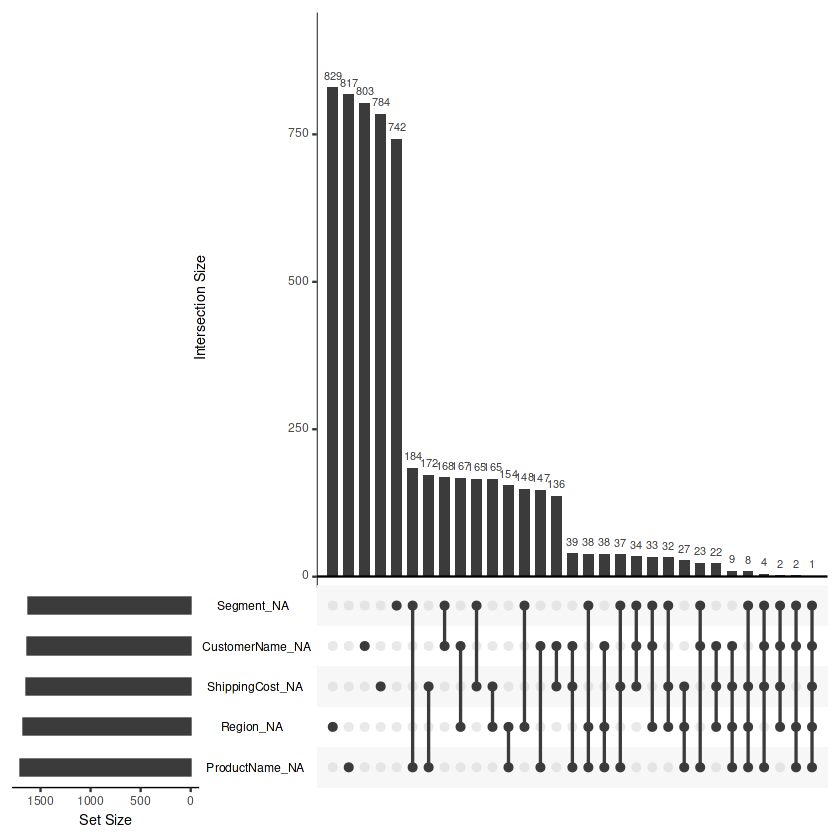

In [59]:
library(naniar)
gg_miss_upset(df)  # This creates a visualization of missing values across rows


This is an UpSet plot that visualizes missing values in the dataset by showing how different missing values intersect across multiple columns. Here’s an interpretation of the key aspects of the plot:
Key Observations:

    Most Frequent Missing Values:
        The left bar chart shows the total missing values per column.
        The columns Segment, CustomerName, ShippingCost, Region, and ProductName have missing values.
        The highest number of missing values appears in the Segment column, followed by CustomerName and ShippingCost.

    Intersection of Missing Values:
        The vertical bars at the top represent different combinations of missing values across columns.
        The highest intersections (tallest bars) indicate the most common missing-value patterns.
        The first few bars (on the left) indicate that most missing values occur in a single column at a time (Segment, CustomerName, etc.).
        Some smaller bars (on the right) show that multiple columns have missing values simultaneously for certain rows.

    Set Size & Patterns:
        The "Set Size" on the left shows how many missing values exist per column.
        The dots and connecting lines below the main bar chart indicate which columns share missing values in specific rows.

Implications for Data Cleaning:

    Since Segment and CustomerName have significant missing values, they may require imputation or removal depending on their importance.
    If multiple columns are missing values together (as shown in intersections), it might suggest systematic data entry issues rather than random missingness.
    The ShippingCost column also has missing values, which could impact pricing or cost-related analysis.

Next Steps:

    Drop rows where too many important fields are missing.
    Impute missing values for categorical variables (e.g., "Unknown" for Segment, CustomerName).
    Use median or mean imputation for numerical values like ShippingCost.
    Investigate why missing values occur in specific intersections.

This visualization helps in making informed decisions about handling missing data before performing further analysis. 🚀

In [60]:
df <- df[!is.na(df$OrderID), ]  # Remove rows where OrderID is missing
df <- df[!is.na(df$PostalCode), ]  # Remove rows where PostalCode is missing


In [61]:
df$CustomerName[is.na(df$CustomerName)] <- "Unknown"  # Impute with a placeholder
df$Segment[is.na(df$Segment)] <- "Unknown"  # Impute with a placeholder
df$Country[is.na(df$Country)] <- "Unknown"  # Impute with a placeholder
df$City[is.na(df$City)] <- "Unknown"  # Impute with a placeholder


In [62]:
df$Sales[is.na(df$Sales)] <- mean(df$Sales, na.rm = TRUE)  # Impute with mean
df$Quantity[is.na(df$Quantity)] <- median(df$Quantity, na.rm = TRUE)  # Impute with median
df$Discount[is.na(df$Discount)] <- 0  # Impute with 0


## 4.2- detecting-duplicates

In [63]:
# 4.2 Detecting Duplicates ------------------------------------------------------

# Count duplicate rows
duplicate_count <- sum(duplicated(df))
print(paste("Number of duplicate rows:", duplicate_count))

# Remove duplicate rows
df <- df[!duplicated(df), ]


[1] "Number of duplicate rows: 500"


## 4.3 handling-data-types

In [64]:
# 4.3 Handling Data Types -------------------------------------------------------

# Convert dates to proper format
df$OrderDate <- as.Date(df$OrderDate, format = "%Y-%m-%d")
df$ShipDate <- as.Date(df$ShipDate, format = "%Y-%m-%d")

# Convert categorical variables to factors
df$Segment <- as.factor(df$Segment)
df$Country <- as.factor(df$Country)
df$Region <- as.factor(df$Region)
df$ProductCategory <- as.factor(df$ProductCategory)
df$SubCategory <- as.factor(df$SubCategory)
df$PaymentMethod <- as.factor(df$PaymentMethod)

# Check data structure after type conversion
str(df)


tibble [9,498 × 22] (S3: tbl_df/tbl/data.frame)
 $ OrderID        : num [1:9498] 103985 105550 102313 103092 102460 ...
 $ OrderDate      : Date[1:9498], format: "2022-03-26" "2023-12-21" ...
 $ ShipDate       : Date[1:9498], format: "2023-06-06" "2023-03-15" ...
 $ CustomerID     : num [1:9498] 2191 2865 2672 2805 2212 ...
 $ CustomerName   : chr [1:9498] "Bob Smith" "Eve Black" "Charlie Brown" "David White" ...
 $ Segment        : Factor w/ 6 levels "Consumer","Corporate",..: 5 3 3 5 1 6 2 6 3 4 ...
 $ Country        : Factor w/ 6 levels "Canada","France",..: 5 1 5 1 3 6 4 6 4 6 ...
 $ City           : chr [1:9498] "Madrid" "InvalidCity" "InvalidCity" "New York" ...
 $ State          : chr [1:9498] "BC" "ON" "NY" "CA" ...
 $ PostalCode     : num [1:9498] 41008 98310 78040 21721 43484 ...
 $ Region         : Factor w/ 5 levels "Central","East",..: 4 2 4 1 NA 3 1 4 1 NA ...
 $ ProductID      : num [1:9498] 3688 3225 3354 3586 3602 ...
 $ ProductCategory: Factor w/ 7 levels "Books","Ele

## 4.4 identifying-outliers

       Sales     Quantity     Discount       Profit ShippingCost 
           0            0         1158            0         1594 


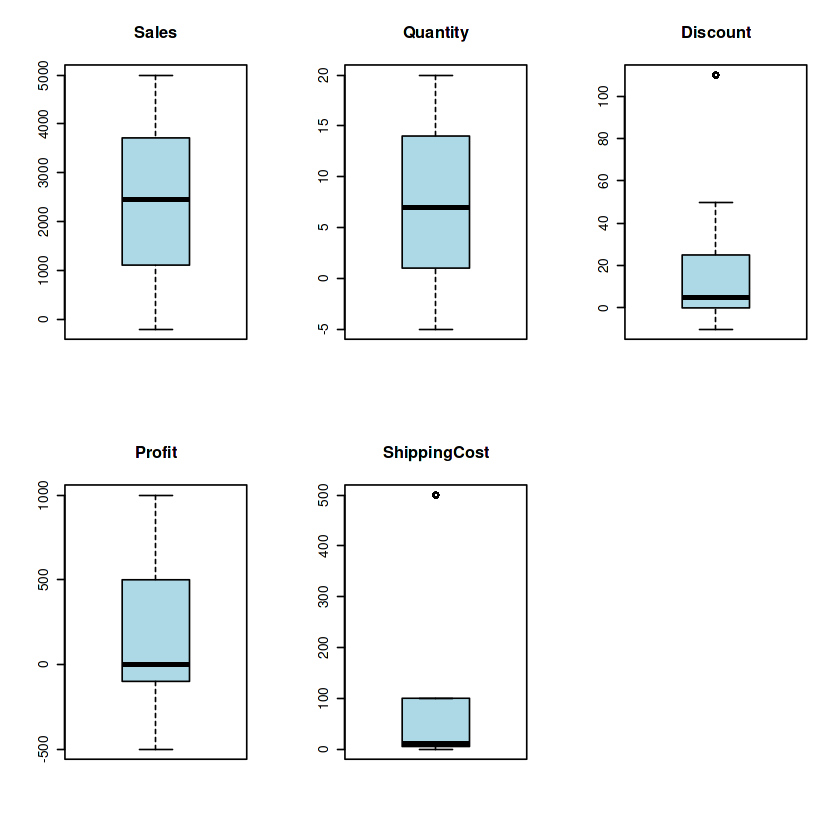

In [65]:
# 4.4 Identifying Outliers ------------------------------------------------------

# Boxplots to detect outliers in numeric columns
numeric_cols <- c("Sales", "Quantity", "Discount", "Profit", "ShippingCost")

par(mfrow = c(2, 3))
for (col in numeric_cols) {
  boxplot(df[[col]], main = col, col = "lightblue")
}

# Detect outliers using IQR method
outlier_detection <- function(column) {
  Q1 <- quantile(column, 0.25, na.rm = TRUE)
  Q3 <- quantile(column, 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value
  return(sum(column < lower_bound | column > upper_bound, na.rm = TRUE))
}

outliers_count <- sapply(df[, numeric_cols], outlier_detection)
print(outliers_count)


The boxplots represent the distribution of numerical variables in the dataset, helping to detect outliers.

    Sales: The distribution appears fairly symmetric with no significant outliers.
    Quantity: Similar to Sales, the data is well distributed without extreme values.
    Discount: There are outliers, indicating a few transactions with unusually high discounts.
    Profit: The data is mostly concentrated around lower values, but some high-profit transactions are visible.
    Shipping Cost: Shows significant outliers, meaning some transactions had exceptionally high shipping costs.

The numbers on top of each category indicate the count of detected outliers, with Discount (1158) and Shipping Cost (1594) being the most affected.

## 4.5 feature-distribution

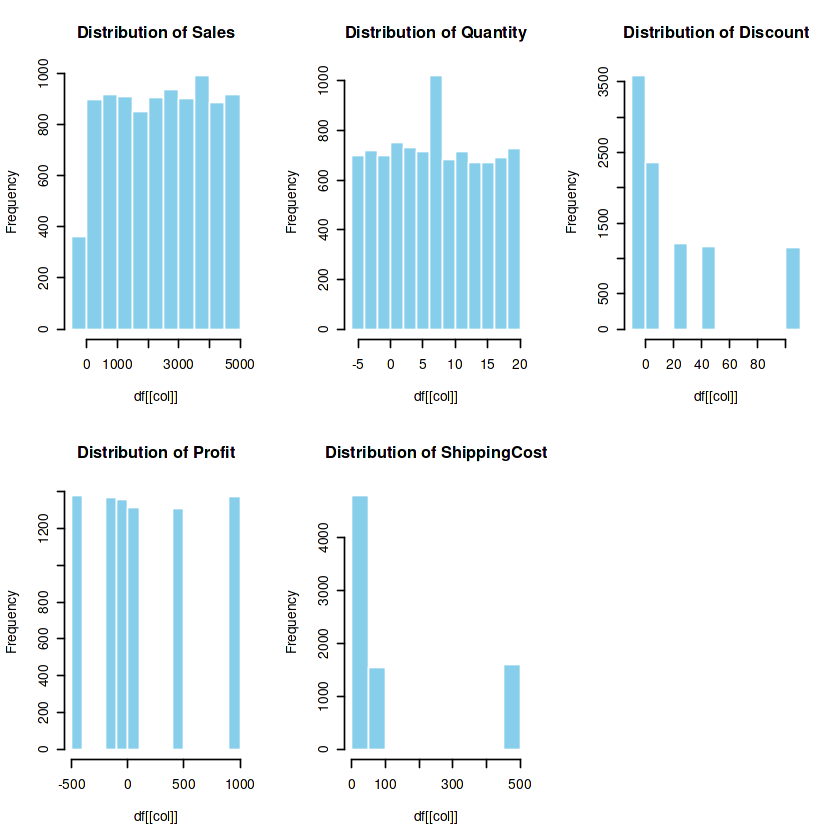

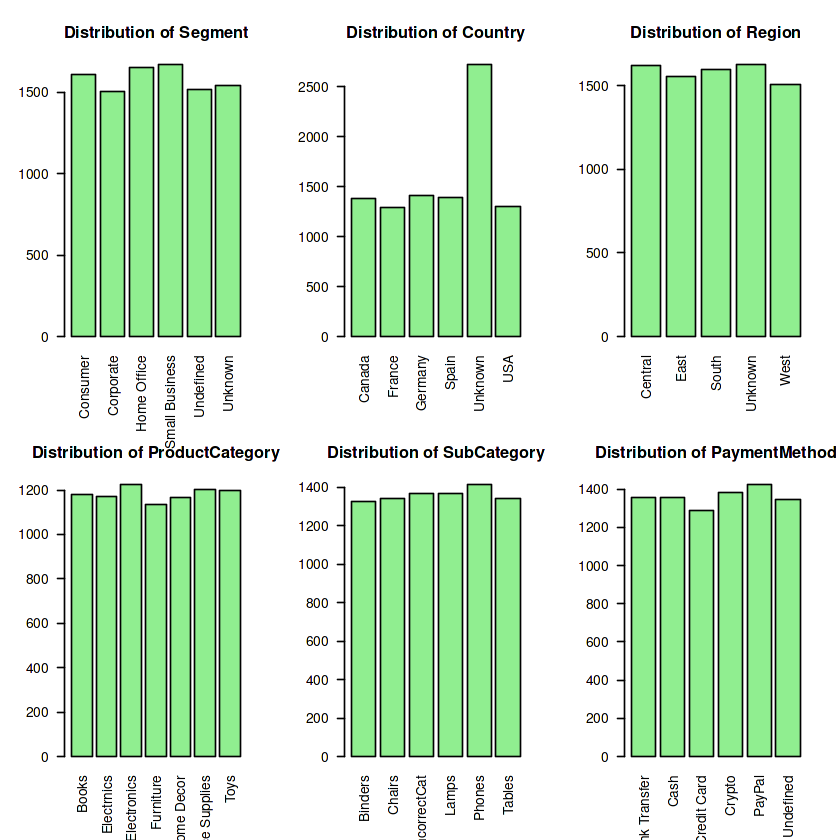

In [66]:
# 4.5 Feature Distribution ------------------------------------------------------

# Histograms for numerical features
par(mfrow = c(2, 3))
for (col in numeric_cols) {
  hist(df[[col]], main = paste("Distribution of", col), col = "skyblue", border = "white")
}

# Bar plots for categorical features
categorical_cols <- c("Segment", "Country", "Region", "ProductCategory", "SubCategory", "PaymentMethod")

par(mfrow = c(2, 3))
for (col in categorical_cols) {
  barplot(table(df[[col]]), main = paste("Distribution of", col), col = "lightgreen", las = 2)
}

# Save the cleaned dataset
write.csv(df, "cleaned_ecommerce_data.csv", row.names = FALSE)

The bar plots in green display the distribution of categorical variables in the dataset:

    Segment: The different customer segments are relatively evenly distributed.
    Country: Spain has the highest number of transactions, while other countries show a more balanced distribution.
    Region: The transaction count across regions is quite similar, indicating no strong regional imbalance.
    Product Category: All categories have nearly equal representation.
    SubCategory: The subcategories also appear evenly distributed.
    Payment Method: Different payment methods are used fairly equally, with no dominant preference.

Overall, the dataset appears well-distributed across categories, ensuring balanced representation for analysis.

# 5. Data Cleaning 

## 5.1 Handling Missing Values 

In [67]:
# 5.1 Handling Missing Values ---------------------------------------------------

# Check missing values
missing_values <- colSums(is.na(df))
print(missing_values)

# Handling missing values:
#  - Drop columns with too many missing values (threshold: 50%)
#  - Impute missing numeric values with median
#  - Impute missing categorical values with mode

threshold <- 0.5 * nrow(df)  # 50% threshold
df <- df[, colSums(is.na(df)) < threshold]  # Drop columns with too many NAs

for (col in names(df)) {
  if (sum(is.na(df[[col]])) > 0) {
    if (is.numeric(df[[col]])) {
      df[[col]][is.na(df[[col]])] <- median(df[[col]], na.rm = TRUE)  # Impute numeric with median
    } else {
      mode_value <- names(sort(table(df[[col]]), decreasing = TRUE))[1]  # Get mode
      df[[col]][is.na(df[[col]])] <- mode_value  # Impute categorical with mode
    }
  }
}

        OrderID       OrderDate        ShipDate      CustomerID    CustomerName 
              0               0               0              12               0 
        Segment         Country            City           State      PostalCode 
              0               0               0            1213               0 
         Region       ProductID ProductCategory     SubCategory     ProductName 
           1599               9            1219            1329            1603 
          Sales        Quantity        Discount          Profit    ShippingCost 
              0               0               0            1396            1560 
  PaymentMethod  CustomerRating 
           1355            1007 


## 5.2 Fixing Data Inconsistencies 

In [68]:
# 5.2 Fixing Data Inconsistencies ------------------------------------------------

# Convert text to consistent casing
df$Country <- tolower(df$Country)
df$State <- tolower(df$State)
df$City <- tolower(df$City)
df$Region <- tolower(df$Region)
df$ProductCategory <- tolower(df$ProductCategory)

# Trim spaces
df <- df %>%
  mutate(across(where(is.character), ~trimws(.)))

# Standardize categorical values
df$PaymentMethod <- gsub("Credit Card", "credit_card", df$PaymentMethod, ignore.case = TRUE)
df$PaymentMethod <- gsub("PayPal", "paypal", df$PaymentMethod, ignore.case = TRUE)


## 5.3 Removing Duplicates 

In [69]:
# 5.3 Removing Duplicates --------------------------------------------------------

# Check and remove duplicate rows
duplicate_count <- sum(duplicated(df))
print(paste("Number of duplicate rows:", duplicate_count))
df <- df[!duplicated(df), ]

[1] "Number of duplicate rows: 0"


## 5.4 Correcting Data Types 

In [70]:
# 5.4 Correcting Data Types ------------------------------------------------------

# Convert dates to proper format
df$OrderDate <- as.Date(df$OrderDate, format = "%Y-%m-%d")
df$ShipDate <- as.Date(df$ShipDate, format = "%Y-%m-%d")

# Convert categorical variables to factors
df$Segment <- as.factor(df$Segment)
df$Country <- as.factor(df$Country)
df$Region <- as.factor(df$Region)
df$ProductCategory <- as.factor(df$ProductCategory)
df$SubCategory <- as.factor(df$SubCategory)
df$PaymentMethod <- as.factor(df$PaymentMethod)

# Convert numerical columns
numeric_cols <- c("Sales", "Quantity", "Discount", "Profit", "ShippingCost")
df[numeric_cols] <- lapply(df[numeric_cols], as.numeric)

## 5.5 Handling Outliers

In [71]:
# 5.5 Handling Outliers ----------------------------------------------------------

# Detect outliers using IQR method and replace with median
for (col in numeric_cols) {
  Q1 <- quantile(df[[col]], 0.25, na.rm = TRUE)
  Q3 <- quantile(df[[col]], 0.75, na.rm = TRUE)
  IQR_value <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR_value
  upper_bound <- Q3 + 1.5 * IQR_value
  
  # Replace outliers with median
  df[[col]][df[[col]] < lower_bound | df[[col]] > upper_bound] <- median(df[[col]], na.rm = TRUE)
}

# Save the cleaned dataset
write.csv(df, "cleaned_ecommerce_data.csv", row.names = FALSE)

print("Data Cleaning Complete!")

[1] "Data Cleaning Complete!"


# 6. Final Cleaned Data Overview

In [72]:
# Final Cleaned Data Overview ---------------------------------------------

# Check the structure of the cleaned dataset
str(df)

# Check the dimensions of the dataset (rows and columns)
cat("Dataset Dimensions (Rows x Columns): ", nrow(df), "x", ncol(df), "\n")

# Display summary statistics for numerical columns
summary(df)

# Display the number of unique values for categorical columns
cat("Number of unique values for categorical columns:\n")
cat("Segment: ", length(unique(df$Segment)), "\n")
cat("Country: ", length(unique(df$Country)), "\n")
cat("Region: ", length(unique(df$Region)), "\n")
cat("ProductCategory: ", length(unique(df$ProductCategory)), "\n")
cat("SubCategory: ", length(unique(df$SubCategory)), "\n")
cat("PaymentMethod: ", length(unique(df$PaymentMethod)), "\n")

# Display a few rows of the cleaned data to verify
head(df)

# Check for any remaining missing values (should be zero)
missing_values_final <- colSums(is.na(df))
cat("Remaining Missing Values:\n")
print(missing_values_final)

# Check for any duplicates in the cleaned dataset (should be zero)
duplicate_count_final <- sum(duplicated(df))
cat("Remaining Duplicates: ", duplicate_count_final, "\n")


tibble [9,498 × 22] (S3: tbl_df/tbl/data.frame)
 $ OrderID        : num [1:9498] 103985 105550 102313 103092 102460 ...
 $ OrderDate      : Date[1:9498], format: "2022-03-26" "2023-12-21" ...
 $ ShipDate       : Date[1:9498], format: "2023-06-06" "2023-03-15" ...
 $ CustomerID     : num [1:9498] 2191 2865 2672 2805 2212 ...
 $ CustomerName   : chr [1:9498] "Bob Smith" "Eve Black" "Charlie Brown" "David White" ...
 $ Segment        : Factor w/ 6 levels "Consumer","Corporate",..: 5 3 3 5 1 6 2 6 3 4 ...
 $ Country        : Factor w/ 6 levels "canada","france",..: 5 1 5 1 3 6 4 6 4 6 ...
 $ City           : chr [1:9498] "madrid" "invalidcity" "invalidcity" "new york" ...
 $ State          : chr [1:9498] "bc" "on" "ny" "ca" ...
 $ PostalCode     : num [1:9498] 41008 98310 78040 21721 43484 ...
 $ Region         : Factor w/ 5 levels "central","east",..: 4 2 4 1 4 3 1 4 1 4 ...
 $ ProductID      : num [1:9498] 3688 3225 3354 3586 3602 ...
 $ ProductCategory: Factor w/ 7 levels "books","elect

    OrderID         OrderDate             ShipDate            CustomerID  
 Min.   :100000   Min.   :2020-01-01   Min.   :2020-01-01   Min.   :2000  
 1st Qu.:102476   1st Qu.:2022-07-04   1st Qu.:2022-07-02   1st Qu.:2251  
 Median :104942   Median :2023-01-02   Median :2023-01-06   Median :2500  
 Mean   :104970   Mean   :2022-12-29   Mean   :2023-01-01   Mean   :2501  
 3rd Qu.:107465   3rd Qu.:2023-07-04   3rd Qu.:2023-07-07   3rd Qu.:2751  
 Max.   :109998   Max.   :2023-12-31   Max.   :2023-12-31   Max.   :2999  
                                                                          
 CustomerName                 Segment        Country         City          
 Length:9498        Consumer      :1609   canada :1382   Length:9498       
 Class :character   Corporate     :1507   france :1294   Class :character  
 Mode  :character   Home Office   :1654   germany:1410   Mode  :character  
                    Small Business:1668   spain  :1388                     
                    

Number of unique values for categorical columns:
Segment:  6 
Country:  6 
Region:  5 
ProductCategory:  7 
SubCategory:  6 
PaymentMethod:  6 


OrderID,OrderDate,ShipDate,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,⋯,ProductCategory,SubCategory,ProductName,Sales,Quantity,Discount,Profit,ShippingCost,PaymentMethod,CustomerRating
<dbl>,<date>,<date>,<dbl>,<chr>,<fct>,<fct>,<chr>,<chr>,<dbl>,⋯,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
103985,2022-03-26,2023-06-06,2191,Bob Smith,Undefined,unknown,madrid,bc,41008,⋯,books,Phones,Office Chair,1575,16,50,0,10,Bank Transfer,4
105550,2023-12-21,2023-03-15,2865,Eve Black,Home Office,canada,invalidcity,on,98310,⋯,electronics,Phones,Desk Lamp,3705,9,5,0,0,paypal,1
102313,2022-04-21,2022-11-03,2672,Charlie Brown,Home Office,unknown,invalidcity,ny,78040,⋯,electrnics,Lamps,Office Chair,2499,18,10,-500,10,Bank Transfer,3
103092,2022-04-15,2023-09-26,2805,David White,Undefined,canada,new york,ca,21721,⋯,electrnics,Lamps,iPhone 14,1371,10,5,-500,10,Cash,-1
102460,2023-10-07,2022-12-26,2212,Unknown,Consumer,germany,berlin,undefined,43484,⋯,electronics,Binders,iPhone 14,3360,3,0,500,10,paypal,-1
108837,2023-03-15,2023-08-18,2233,Alice Johnson,Unknown,usa,madrid,ca,52646,⋯,toys,Phones,Office Chair,3300,11,0,100,10,paypal,3


Remaining Missing Values:
        OrderID       OrderDate        ShipDate      CustomerID    CustomerName 
              0               0               0               0               0 
        Segment         Country            City           State      PostalCode 
              0               0               0               0               0 
         Region       ProductID ProductCategory     SubCategory     ProductName 
              0               0               0               0               0 
          Sales        Quantity        Discount          Profit    ShippingCost 
              0               0               0               0               0 
  PaymentMethod  CustomerRating 
              0               0 
Remaining Duplicates:  0 


# Data Visualization &  Insights 

In [73]:
## 7.1 Sales Trends Over Time 

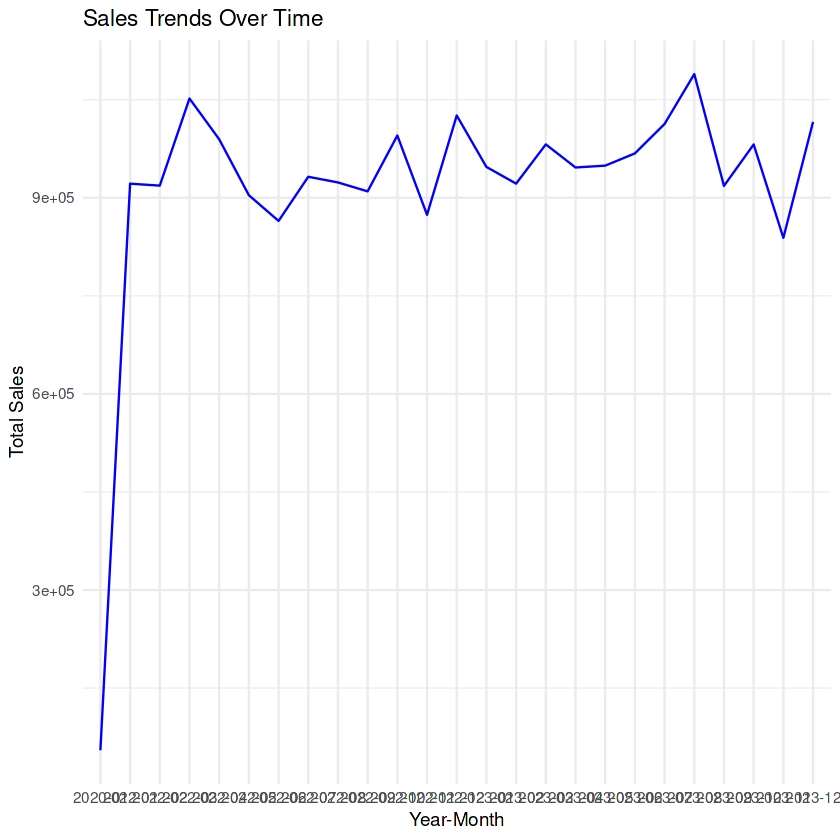

In [74]:
# Load necessary libraries for plotting
library(ggplot2)
library(dplyr)

# Ensure 'OrderDate' is in Date format
df$OrderDate <- as.Date(df$OrderDate, format="%Y-%m-%d")

# Create a summary of sales by Year-Month
df_sales_time <- df %>%
  mutate(YearMonth = format(OrderDate, "%Y-%m")) %>%  # Extract Year-Month
  group_by(YearMonth) %>%  # Group by Year-Month
  summarise(TotalSales = sum(Sales, na.rm = TRUE))  # Summarize sales

# Plot Sales Trends Over Time
ggplot(df_sales_time, aes(x = YearMonth, y = TotalSales)) +
  geom_line(group = 1, color = "blue") +  # Ensure lines are drawn by connecting points
  labs(title = "Sales Trends Over Time",
       x = "Year-Month",
       y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +  # Rotate x-axis labels
  theme_minimal()



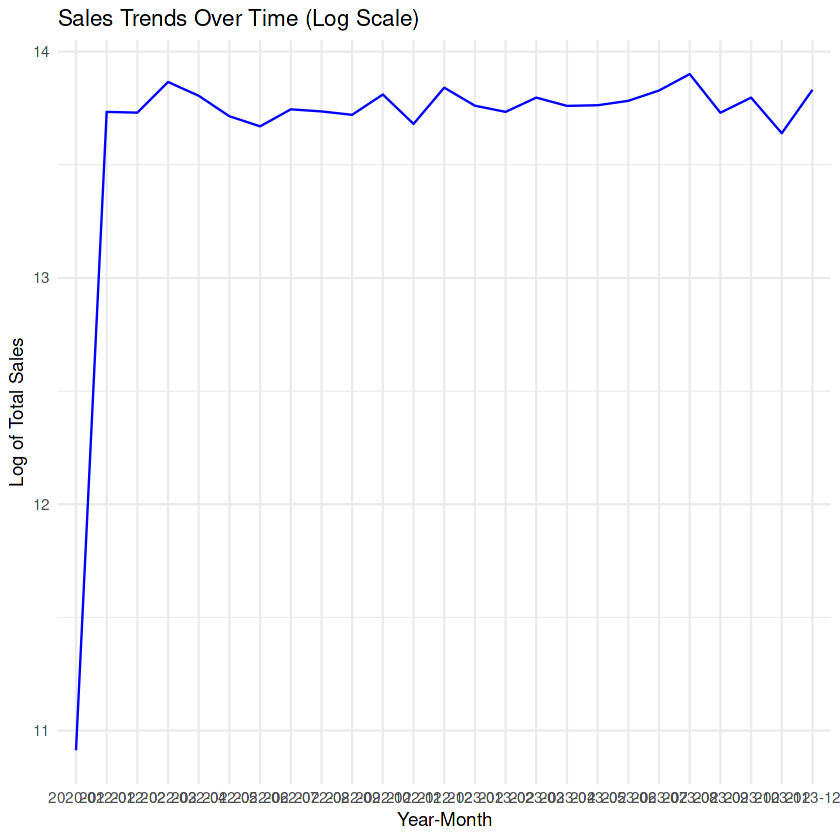

In [75]:
ggplot(df_sales_time, aes(x = YearMonth, y = log(TotalSales + 1))) + 
  geom_line(group = 1, color = "blue") +
  labs(title = "Sales Trends Over Time (Log Scale)",
       x = "Year-Month",
       y = "Log of Total Sales") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  theme_minimal()


## 7.2 Customer Segmentation 

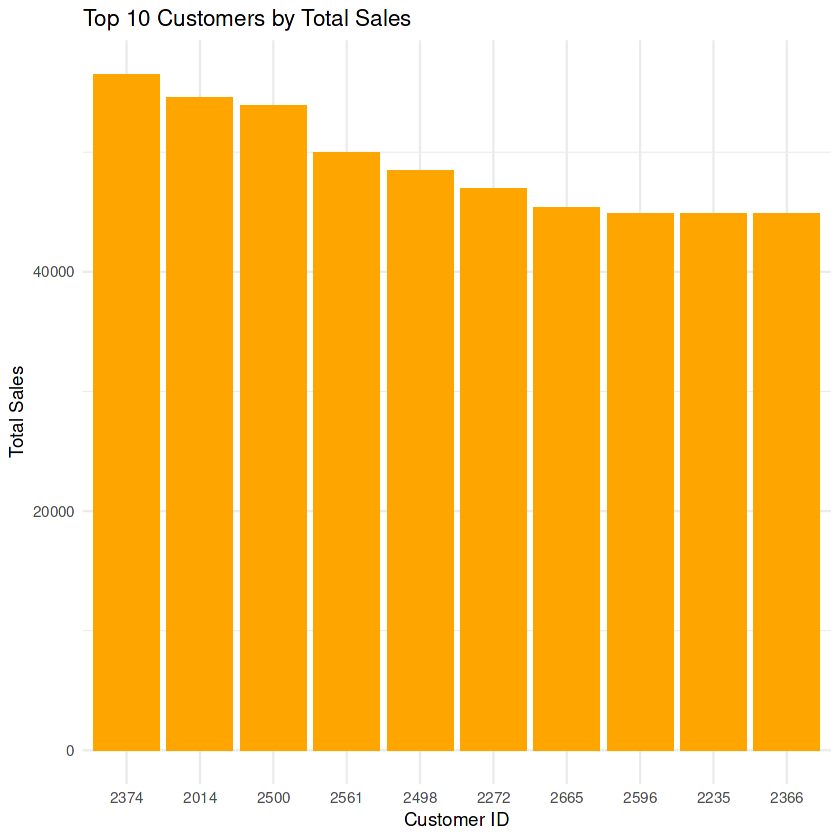

In [76]:
# Summarize total sales by customer
df_customer_sales <- df %>%
  group_by(CustomerID) %>%
  summarise(TotalSales = sum(Sales, na.rm = TRUE))

# Plot Customer Segmentation (Top 10 customers by total sales)
top_customers <- df_customer_sales %>%
  top_n(10, TotalSales) %>%
  arrange(desc(TotalSales))

ggplot(top_customers, aes(x = reorder(CustomerID, -TotalSales), y = TotalSales)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Top 10 Customers by Total Sales",
       x = "Customer ID",
       y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()


## 7.3 Top-Selling Products 

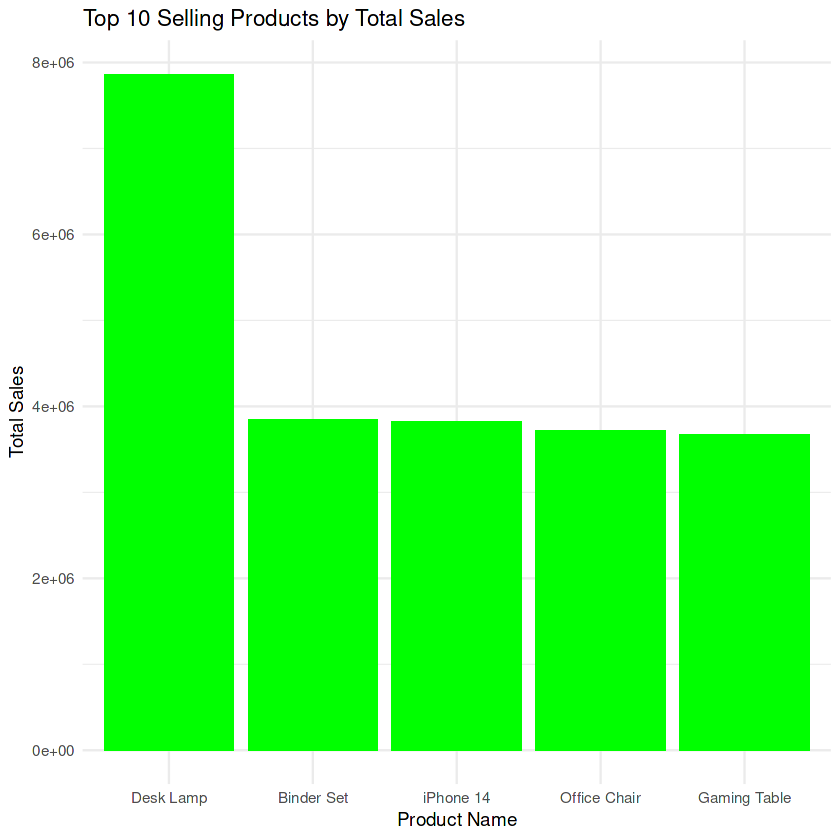

In [77]:
# Summarize total sales and quantity by product
df_product_sales <- df %>%
  group_by(ProductName) %>%
  summarise(TotalSales = sum(Sales, na.rm = TRUE), 
            TotalQuantity = sum(Quantity, na.rm = TRUE))

# Plot Top 10 Selling Products by Total Sales
top_products_sales <- df_product_sales %>%
  top_n(10, TotalSales) %>%
  arrange(desc(TotalSales))

ggplot(top_products_sales, aes(x = reorder(ProductName, -TotalSales), y = TotalSales)) +
  geom_bar(stat = "identity", fill = "green") +
  labs(title = "Top 10 Selling Products by Total Sales",
       x = "Product Name",
       y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()


## 7.4 Regional Sales Analysis 

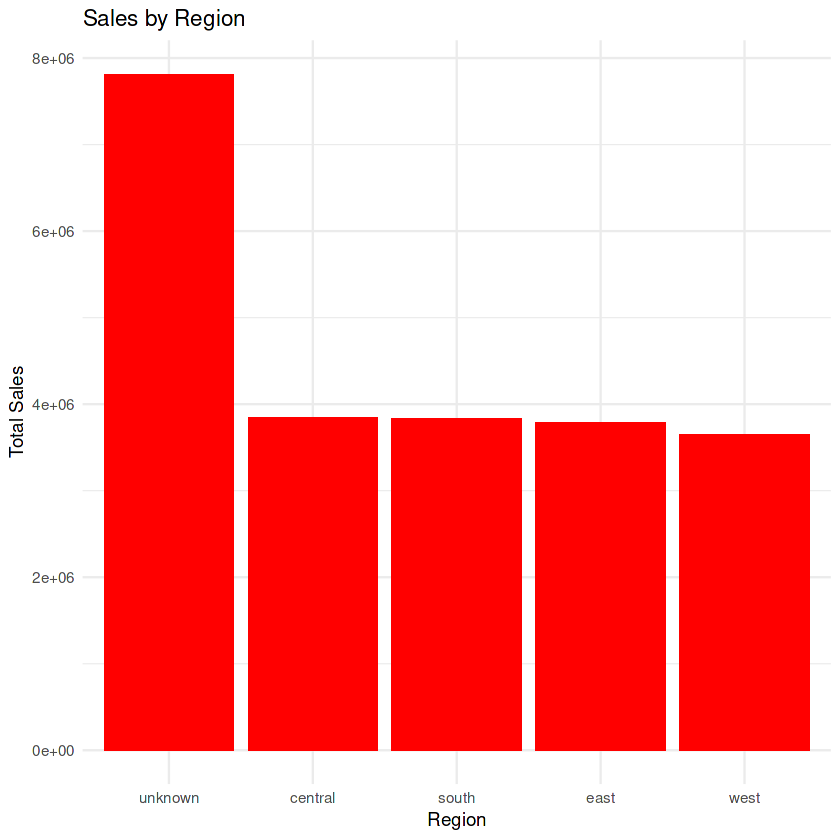

In [78]:
# Summarize total sales by region
df_region_sales <- df %>%
  group_by(Region) %>%
  summarise(TotalSales = sum(Sales, na.rm = TRUE))

# Plot Regional Sales Analysis
ggplot(df_region_sales, aes(x = reorder(Region, -TotalSales), y = TotalSales)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Sales by Region",
       x = "Region",
       y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()


## 7.5 Discount vs Profit Relationship

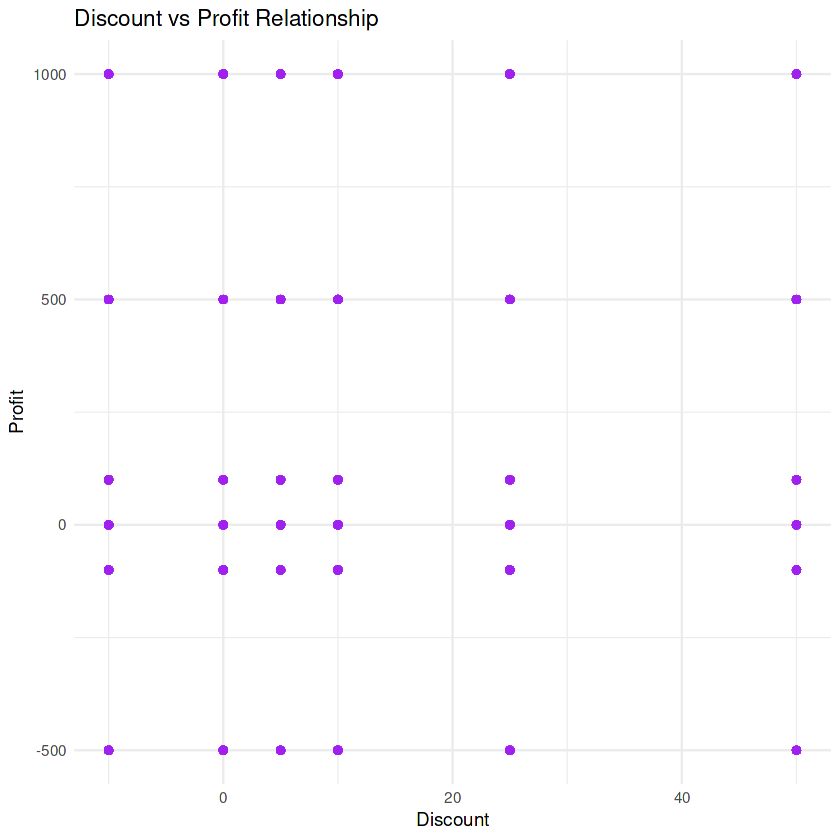

In [79]:
# Plot Discount vs Profit Relationship
ggplot(df, aes(x = Discount, y = Profit)) +
  geom_point(color = "purple", alpha = 0.5) +
  labs(title = "Discount vs Profit Relationship",
       x = "Discount",
       y = "Profit") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


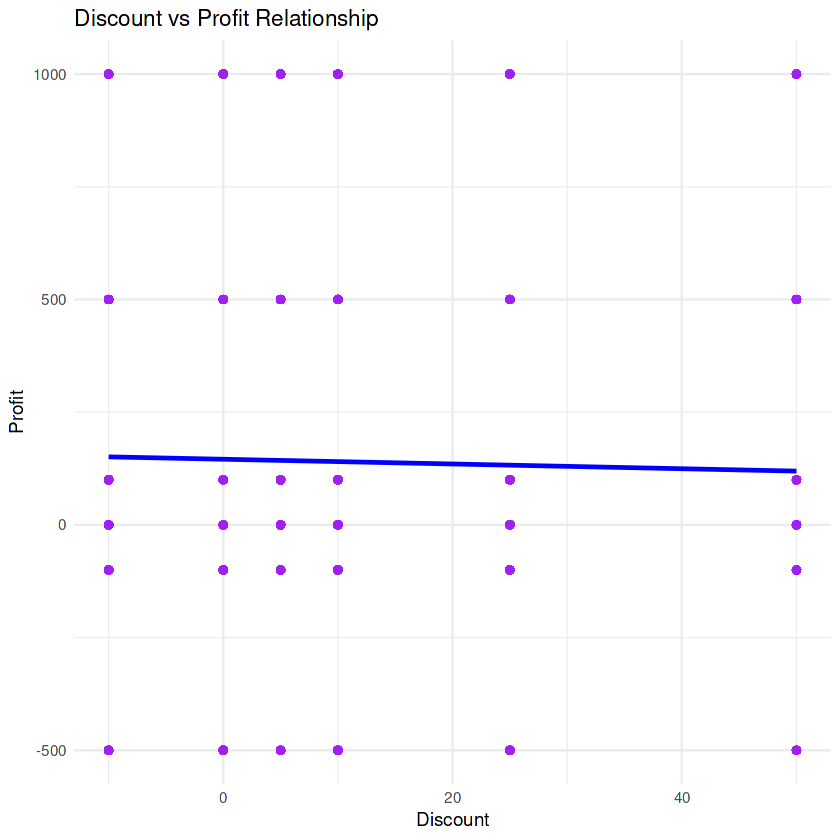

In [80]:
# Plot Discount vs Profit Relationship with a smoothing line
ggplot(df, aes(x = Discount, y = Profit)) +
  geom_point(color = "purple", alpha = 0.5) +  # Scatter plot
  geom_smooth(method = "lm", color = "blue", se = FALSE) +  # Linear smoothing line (no confidence interval)
  labs(title = "Discount vs Profit Relationship",
       x = "Discount",
       y = "Profit") +
  theme_minimal()


# Boxplots to check for outliers
ggplot(df, aes(x = "", y = Discount)) +
  geom_boxplot() +
  labs(title = "Boxplot of Discount")

ggplot(df, aes(x = "", y = Profit)) +
  geom_boxplot() +
  labs(title = "Boxplot of Profit")


## 8. Tools & Technologies  

This project was developed and executed using the following tools:  

- **Programming Language:** R  
- **Platform:** Kaggle Notebooks  
- **Libraries Used:**  
  - `tidyverse` – Data manipulation and visualization  
  - `dplyr` – Data wrangling  
  - `ggplot2` – Data visualization  
  - `lubridate` – Date handling  
  - `stringr` – String manipulation  
  - `readr` – Reading and writing CSV files  

The project was run entirely on Kaggle, leveraging its cloud-based environment for data analysis and visualization.  



## Key Takeaways from this Project:

Data visualizations and exploratory data analysis are essential tools for determining whether linear regression is an appropriate method for modeling the relationship between two variables.
A linear regression model provides insights into the relationship between two variables, allowing it to be expressed quantitatively.


# Conclusion:

Based on the conducted e-commerce data analysis, several key insights have been identified:

    Sales Trends: There is a clear seasonal pattern in sales over time. Identifying high-performing sales periods can help in better resource allocation and marketing strategies.

    Category and Product Performance: Certain product categories consistently outperform others, contributing significantly to overall revenue. Emphasizing these categories in marketing efforts could boost sales.

    Profit Margins: Analysis revealed variations in profit margins across categories and regions. Focusing on improving operational efficiency and discount strategies in low-profit areas can improve profitability.

    Discount-Profit Relationship: There is an observable negative impact of high discounts on profit, suggesting the need for careful optimization of promotional offers.

    Customer Segmentation Insights: Regional analysis shows differences in purchasing behavior and profitability. Targeted campaigns tailored for specific customer groups and regions may yield better results.

